In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags, kron, eye, diags
from scipy.sparse.linalg import spsolve
import scipy.sparse as sp
import pandas as pd

**Finite difference discretization**

In [2]:
# Generating a rectangular grid
Xpoint, Ypoint = 50, 50
domain_size = 1.0
Xspacing, Yspacing = domain_size / (Xpoint - 1), domain_size / (Ypoint - 1)
x, y = np.linspace(0, domain_size, Xpoint), np.linspace(0, domain_size, Ypoint)
X, Y = np.meshgrid(x, y, indexing="ij")
print(f'x.shape={x.shape} - y.shape={y.shape}')
print(f'X.shape={X.shape} - Y.shape={Y.shape}')

x.shape=(50,) - y.shape=(50,)
X.shape=(50, 50) - Y.shape=(50, 50)


In [7]:
def print_sparse_matrix(matrix, precision=2):
    # Convert sparse matrix to dense
    dense_matrix = matrix.toarray()

    # Print the matrix with proper formatting
    print("Tridiagonal Matrix:")
    for row in dense_matrix:
        print("  ".join(f"{val:10.{precision}f}" for val in row))

# Defining the exact solution and f source term
u_exact = np.sin(np.pi * X)**2 * np.sin(np.pi * Y)**2
f_source =  -(2 * np.pi**2 * (np.cos(2 * np.pi * X) * np.sin(np.pi * Y)**2 + np.cos(2 * np.pi * Y) * np.sin(np.pi * X)**2))
# constructing the discrete Laplacian operator
N = (Xpoint - 2) * (Ypoint - 2)
ex = np.ones(Xpoint - 2)
ey = np.ones(Ypoint - 2)
Tridiagonal_matrix_X = spdiags([ex, -2 * ex, ex], [-1, 0, 1], Xpoint - 2, Xpoint - 2) / Xspacing**2
Tridiagonal_matrix_Y = spdiags([ey, -2 * ey, ey], [-1, 0, 1], Ypoint - 2, Ypoint - 2) / Yspacing**2
Kronecker_product = kron(eye(Ypoint - 2), Tridiagonal_matrix_X) + kron(Tridiagonal_matrix_Y, eye(Xpoint - 2))
#Validating my outputs

# Print the matrix
print_sparse_matrix(Tridiagonal_matrix_X)
print_sparse_matrix(Tridiagonal_matrix_Y)

print(f'Tridiagonal matrix X Dimension: {Tridiagonal_matrix_X.shape}')
print(f'Tridiagonal matrix Y Dimension: {Tridiagonal_matrix_Y.shape}')

Tridiagonal Matrix:
  -4802.00     2401.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00
   2401.00    -4802.00     2401.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.0

In [16]:
def print_matrix(matrix, precision=2):

    # Convert sparse to dense if necessary
    if sp.issparse(matrix):
        matrix = matrix.toarray()

    # Print the matrix in formatted style
    print("\nu_numerical Matrix:")
    for row in matrix:
        print("  ".join(f"{val:10.{precision}f}" for val in row))

# Flatten the f source term and appdomain_size boundary conditions
f_interior = f_source[1:-1, 1:-1].flatten()
b = np.zeros_like(f_interior)
f_total = f_interior + b

# Solving the linear system
u_interior = spsolve(Kronecker_product, f_total)
u_numerical = np.zeros_like(X)
u_numerical[1:-1, 1:-1] = np.reshape(u_interior, (Xpoint - 2, Ypoint - 2))

# Validating the Exact and  Numerical result
error = np.max(np.abs(u_exact - u_numerical))
print(f"Maximum error: {error:.5e}")
print(f_interior.shape)
print_matrix(u_numerical)
# print(u_numerical)
print(b.shape)

Maximum error: 1.99726e+00
(2304,)

u_numerical Matrix:
      0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00
      0.00       -0.00       -0.00       -0.00       -0.00       -0.00       -0.00       -0.00       -0.00       -0.00       -0.00       -0.00       -0.00       -0.00       -0.00       -0.00       -0.00       -0.00       -0.00       -0.00       -0.00       -0.00       -0.00       -0.00       -0.00       -0.00       -0.00       -0.00       -0.0

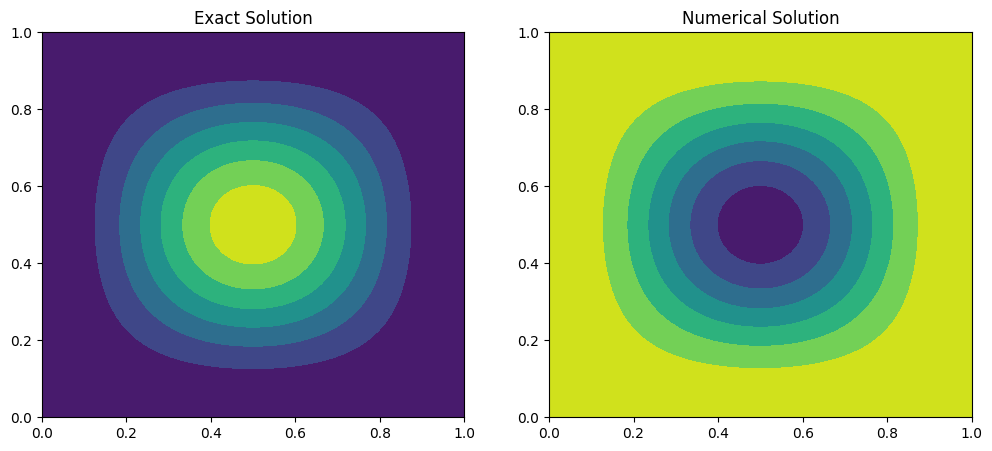

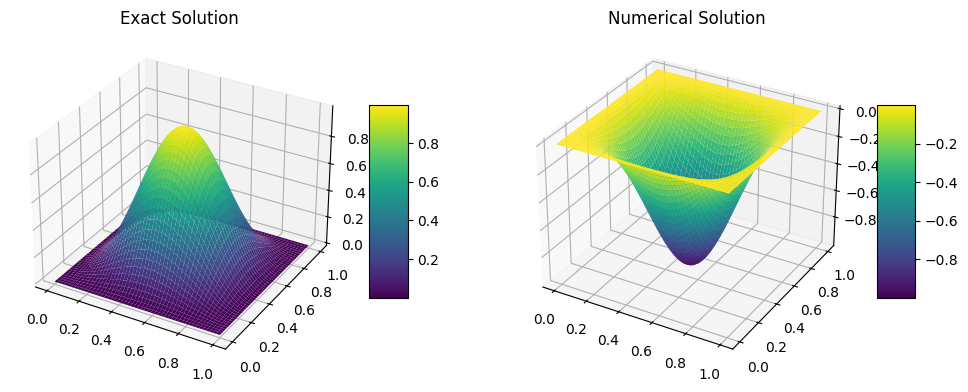

In [ ]:
# Plotting the exact and numerical solutions in 2d projection
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].contourf(X, Y, u_exact, cmap='viridis')
axes[0].set_title("Exact Solution")
axes[1].contourf(X, Y, u_numerical, cmap='viridis')
axes[1].set_title("Numerical Solution")
plt.show()

from mpl_toolkits.mplot3d import Axes3D

# Plotting the exact and numerical solutions in 3d projection
fig = plt.figure(figsize=(12, 5))

# Plot for exact solution
ax1 = fig.add_subplot(121, projection='3d')
surf1 = ax1.plot_surface(X, Y, u_exact, cmap='viridis', edgecolor='none')
ax1.set_title("Exact Solution")
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)

# Plot for numerical solution
ax2 = fig.add_subplot(122, projection='3d')
surf2 = ax2.plot_surface(X, Y, u_numerical, cmap='viridis', edgecolor='none')
ax2.set_title("Numerical Solution")
fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=5)

plt.show()

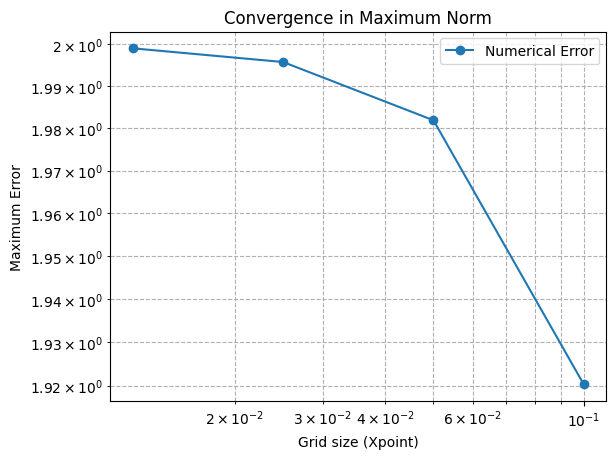

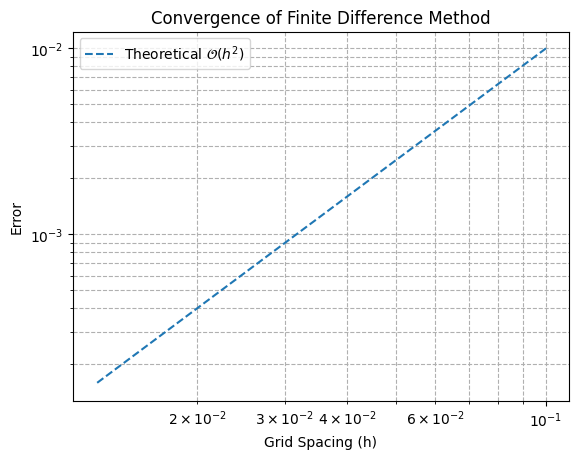

[1.9203561993703464, 1.9818543206287993, 1.9956786304187821, 1.9989459949213921]


In [54]:
# Plotting the convergence
errors = []
grid_sizes = np.array([10, 20, 40, 80])
for n in grid_sizes:
    Xspacing = domain_size / (n - 1)
    Yspacing = domain_size / (n - 1)
    x = np.linspace(0, domain_size, n)
    y = np.linspace(0, domain_size, n)
    X, Y = np.meshgrid(x, y, indexing="ij")
    f = -(2 * np.pi**2 * (np.cos(2 * np.pi * X) * np.sin(np.pi * Y)**2 + np.cos(2 * np.pi * Y) * np.sin(np.pi * X)**2))
    Xpoint, Ypoint = n, n
    ex = np.ones(Xpoint - 2)
    ey = np.ones(Ypoint - 2)
    Tridiagonal_matrix_X = spdiags([ex, -2 * ex, ex], [-1, 0, 1], Xpoint - 2, Xpoint - 2) / Xspacing**2
    Tridiagonal_matrix_Y = spdiags([ey, -2 * ey, ey], [-1, 0, 1], Ypoint - 2, Ypoint - 2) / Yspacing**2
    Kronecker_product = kron(eye(Ypoint - 2), Tridiagonal_matrix_X) + kron(Tridiagonal_matrix_Y, eye(Xpoint - 2))

    f_interior = f[1:-1, 1:-1].flatten()
    b = np.zeros_like(f_interior)
    f_total = f_interior + b

    u_interior = spsolve(Kronecker_product, f_total)
    u_numerical = np.zeros_like(X)
    u_numerical[1:-1, 1:-1] = np.reshape(u_interior, (Xpoint - 2, Ypoint - 2))

    u_exact = np.sin(np.pi * X)**2 * np.sin(np.pi * Y)**2
    error = np.max(np.abs(u_exact - u_numerical))
    errors.append(error)

plt.loglog(1 / grid_sizes, errors, '-o', label='Numerical Error')
plt.title("Convergence in Maximum Norm")
plt.xlabel("Grid size (Xpoint)")
plt.ylabel("Maximum Error")
plt.grid(True, which="both", linestyle="--")
plt.legend()
plt.show()

# plt.figure(figsize=(7,5))

plt.loglog(1 / grid_sizes, (1 / grid_sizes)**2, linestyle='--', label="Theoretical $\mathcal{O}(h^2)$")
plt.xlabel("Grid Spacing (h)")
plt.ylabel("Error")
plt.title("Convergence of Finite Difference Method")
plt.legend()
plt.grid(True, which="both", linestyle="--")
plt.show()
print(errors)

# Part 2.1: Direct methods with sparse representation

In [20]:
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import splu

In [21]:
# Sparse matrix representation
Kronecker_product_sparse = csc_matrix(Kronecker_product)
solver = splu(Kronecker_product_sparse)  # LU decomposition for sparse matrices
u_interior_sparse = solver.solve(f_total)

# Numerical solution
u_numerical_sparse = np.zeros_like(X)
u_numerical_sparse[1:-1, 1:-1] = np.reshape(u_interior_sparse, (Xpoint - 2, Ypoint - 2))

# Validate sparse solution
error_sparse = np.max(np.abs(u_exact - u_numerical_sparse))
print(f"Maximum error with sparse solver: {error_sparse:.5e}")

Maximum error with sparse solver: 1.99895e+00


In [22]:
# Compare computational time
import time

def time_solver(solver_func, *args):
    start = time.time()
    solver_func(*args)
    return time.time() - start

# Timing dense solver
def solve_dense():
    spsolve(Kronecker_product, f_total)

time_dense = time_solver(solve_dense)

# Timing sparse solver
def solve_sparse():
    solver.solve(f_total)

time_sparse = time_solver(solve_sparse)

print(f"Dense solver time: {time_dense:.5f} seconds")
print(f"Sparse solver time: {time_sparse:.5f} seconds")

Dense solver time: 0.02699 seconds
Sparse solver time: 0.00156 seconds


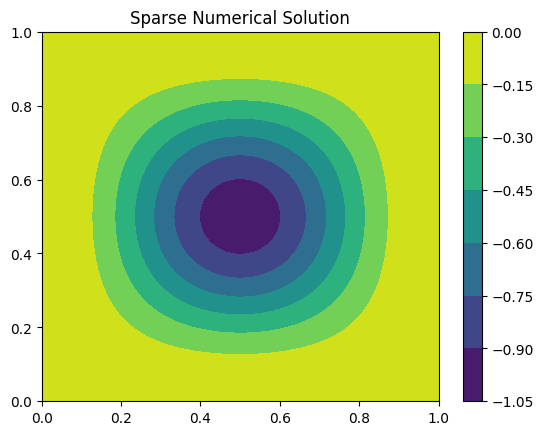

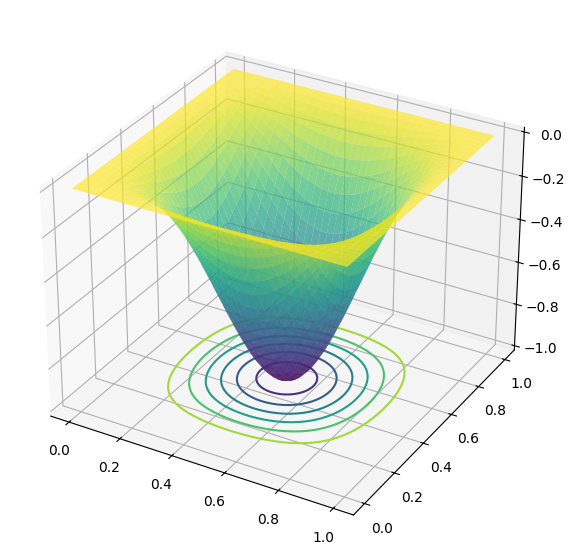

In [30]:
# Plot numerical solution from sparse solver
plt.contourf(X, Y, u_numerical_sparse, cmap='viridis')
plt.title("Sparse Numerical Solution")
plt.colorbar()
plt.show()

# Create a figure for the 3D plot
fig = plt.figure(figsize=(10, 7))

# Add a 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, u_numerical_sparse, cmap='viridis', alpha=0.7)

# Add contour lines projected onto the x-y plane
ax.contour(X, Y, u_numerical_sparse, zdir='u_numerical_sparse', offset=-1, cmap='viridis')

# Show the plot
plt.show()


The eigenvalues of the discrete Laplacian in 2D

# Part 2.2: Iterative methods

In [58]:
# Define function to compute eigenvalues of the 1D Laplacian matrix T
def compute_eigenvalues_1D(N):
    indices = np.arange(1, N + 1)
    eigenvalues = 2 - 2 * np.cos(np.pi * indices / (N + 1))
    return eigenvalues

# Define function to compute eigenvalues of the 2D Laplacian using Kronecker product
def compute_eigenvalues_2D(N):
    lambda_1D = compute_eigenvalues_1D(N)
    lambda_2D = np.array([l1 + l2 for l1 in lambda_1D for l2 in lambda_1D])
    return lambda_2D

# Compute eigenvalues for a given grid size
grid_size = 80  # Example small test
eigenvalues_1D = compute_eigenvalues_1D(grid_size - 2)
eigenvalues_2D = compute_eigenvalues_2D(grid_size - 2)

# Display first few eigenvalues for verification
print(f"Number of eigenvalues in 1D: {(eigenvalues_1D[:5])}")
print(f"Number of eigenvalues in 2D: {(eigenvalues_2D[:5])}")

Number of eigenvalues in 1D: [0.00158121 0.00632232 0.01421585 0.02524932 0.03940527]
Number of eigenvalues in 2D: [0.00316241 0.00790353 0.01579706 0.02683052 0.04098647]


In [62]:
# Jacobi Method
def jacobi(Kronecker_product, b, x0, tol=1e-8, max_iter=10000):
    D = spdiags(Kronecker_product.diagonal(), 0, Kronecker_product.shape[0], Kronecker_product.shape[1])
    R = Kronecker_product - D
    x = x0
    for i in range(max_iter):
        x_new = (b - R @ x) / D.diagonal()
        if np.linalg.norm(x_new - x, np.inf) < tol:
            return x_new, i
        x = x_new
    return x, max_iter

# Gauss-Seidel Method
def gauss_seidel(Kronecker_product, b, x0, tol=1e-8, max_iter=10000):
    x = x0
    n = Kronecker_product.shape[0]
    for k in range(max_iter):
        x_new = np.copy(x)
        for i in range(n):
            sum1 = Kronecker_product[i, :i] @ x_new[:i]
            sum2 = Kronecker_product[i, i + 1:] @ x[i + 1:]
            x_new[i] = (b[i] - sum1 - sum2) / Kronecker_product[i, i]
        if np.linalg.norm(x_new - x, np.inf) < tol:
            return x_new, k
        x = x_new
    return x, max_iter

# SOR Method
def sor(Kronecker_product, b, x0, omega, tol=1e-8, max_iter=10000):
    x = x0
    n = Kronecker_product.shape[0]
    for k in range(max_iter):
        x_new = np.copy(x)
        for i in range(n):
            sum1 = Kronecker_product[i, :i] @ x_new[:i]
            sum2 = Kronecker_product[i, i + 1:] @ x[i + 1:]
            x_new[i] = (1 - omega) * x[i] + omega * (b[i] - sum1 - sum2) / Kronecker_product[i, i]
        if np.linalg.norm(x_new - x, np.inf) < tol:
            return x_new, k
        x = x_new
    return x, max_iter

In [37]:
# Test iterative methods
x0 = np.zeros_like(f_total)

# Jacobi
x_jacobi, iter_jacobi = jacobi(Kronecker_product_sparse, f_total, x0)
print(f"Jacobi converged in {iter_jacobi} iterations with a dimension of {x_jacobi.shape}")

# Gauss-Seidel
x_gs, iter_gs = gauss_seidel(Kronecker_product_sparse.toarray(), f_total, x0)
print(f"Gauss-Seidel converged in {iter_gs} iterations with a dimension of {x_gs.shape}")

# SOR
omega = 1.5  # Relaxation parameter
x_sor, iter_sor = sor(Kronecker_product_sparse.toarray(), f_total, x0, omega)
print(f"SOR converged in {iter_sor} iterations with omega = {omega} with a dimension of {x_sor.shape}")

Jacobi converged in 10000 iterations with a dimension of (6084,)
Gauss-Seidel converged in 7362 iterations with a dimension of (6084,)
SOR converged in 2679 iterations with omega = 1.5 with a dimension of (6084,)


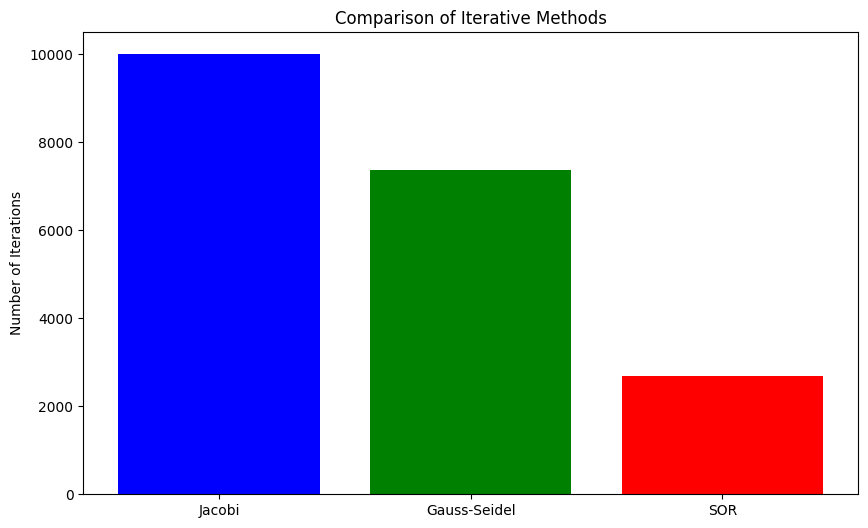

In [38]:
# Residual plot
plt.figure(figsize=(10, 6))
methods = ["Jacobi", "Gauss-Seidel", "SOR"]
iterations = [iter_jacobi, iter_gs, iter_sor]
plt.bar(methods, iterations, color=['blue', 'green', 'red'])
plt.ylabel("Number of Iterations")
plt.title("Comparison of Iterative Methods")
plt.show()

Conjugate Gradient converged in 160 iterations arriving at [-2.49955202e-06 -9.98240513e-06 -2.24012503e-05 ... -2.24012503e-05
 -9.98240513e-06 -2.49955202e-06]


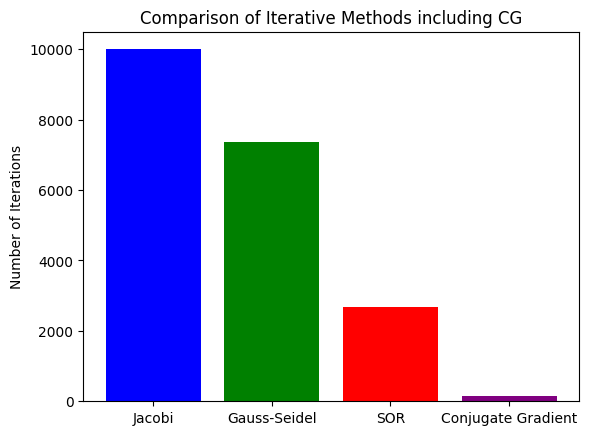

In [42]:
# Implementing Conjugate Gradient Method
def conjugate_gradient(Kronecker_product, b, x0, tol=1e-8, max_iter=10000):
    x = x0
    r = b - Kronecker_product @ x
    p = r
    rsold = r @ r

    for i in range(max_iter):
        Ap = Kronecker_product @ p
        alpha = rsold / (p @ Ap)
        x = x + alpha * p
        r = r - alpha * Ap
        rsnew = r @ r
        if np.sqrt(rsnew) < tol:
            return x, i
        p = r + (rsnew / rsold) * p
        rsold = rsnew
    return x, max_iter

# Test Conjugate Gradient Method
x_cg, iter_cg = conjugate_gradient(Kronecker_product_sparse, f_total, x0)
print(f"Conjugate Gradient converged in {iter_cg} iterations arriving at {x_cg}")

# Compare Residual Decay for CG vs Others
methods = ["Jacobi", "Gauss-Seidel", "SOR", "Conjugate Gradient"]
iterations = [iter_jacobi, iter_gs, iter_sor, iter_cg]
plt.bar(methods, iterations, color=['blue', 'green', 'red', 'purple'])
plt.ylabel("Number of Iterations")
plt.title("Comparison of Iterative Methods including CG")
plt.show()

In [71]:
# Handle Division by Zero in Spectral Radius Computation

def spectral_radius_jacobi(A):
    """ Computes the spectral radius of the Jacobi iteration matrix safely. """
    D = np.diag(A)
    if np.any(D == 0):
        raise ValueError("Zero detected on diagonal, Jacobi method may not converge.")
    D_inv = 1 / D
    R = A - np.diagflat(D)
    M = np.dot(np.diag(D_inv), R)  # Jacobi iteration matrix
    eigvals = np.linalg.eigvals(M)
    return max(abs(eigvals))

# Use Efficient Spectral Radius Computation for Large Matrices
def power_method(A, max_iter=100, tol=1e-6):
    """ Estimate the spectral radius using the power iteration method. """
    b_k = np.random.rand(A.shape[0])
    for _ in range(max_iter):
        b_k1 = A @ b_k
        b_k1_norm = np.linalg.norm(b_k1, ord=2)
        if np.abs(np.linalg.norm(b_k) - b_k1_norm) < tol:
            break
        b_k = b_k1 / b_k1_norm
    return b_k1_norm

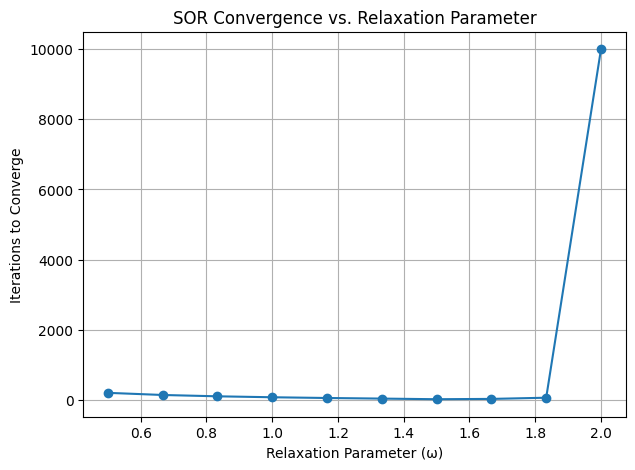

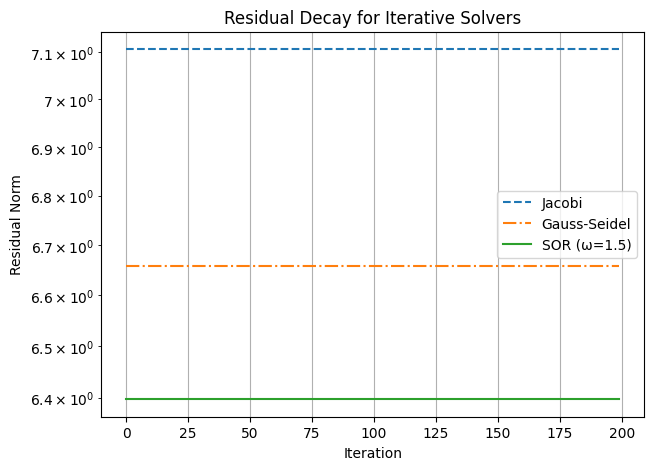


Iterative Solver Performance:
      Method  Iterations  Total Computational Cost
      Jacobi         137                    561152
Gauss-Seidel          75                    307200
 SOR (ω=1.5)          19                     77824


In [72]:
# Re-import necessary libraries after execution state reset
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags, eye, kron
from scipy.sparse.linalg import spsolve
import pandas as pd

# Define Jacobi Method
def jacobi_solver(A, b, tol=1e-6, max_iter=10000):
    """ Jacobi iterative solver """
    x = np.zeros_like(b)
    D = np.diag(A)
    R = A - np.diagflat(D)

    for i in range(max_iter):
        x_new = (b - np.dot(R, x)) / D
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, i
        x = x_new

    return x, max_iter

# Define Gauss-Seidel Method
def gauss_seidel_solver(A, b, tol=1e-6, max_iter=10000):
    """ Gauss-Seidel iterative solver """
    x = np.zeros_like(b)
    n = len(b)

    for i in range(max_iter):
        x_new = np.copy(x)
        for j in range(n):
            sum1 = np.dot(A[j, :j], x_new[:j])
            sum2 = np.dot(A[j, j+1:], x[j+1:])
            x_new[j] = (b[j] - sum1 - sum2) / A[j, j]

        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, i
        x = x_new

    return x, max_iter

# Define SOR Method
def sor_solver(A, b, omega=1.5, tol=1e-6, max_iter=10000):
    """ Successive Over-Relaxation (SOR) solver """
    x = np.zeros_like(b)
    n = len(b)

    for i in range(max_iter):
        x_new = np.copy(x)
        for j in range(n):
            sum1 = np.dot(A[j, :j], x_new[:j])
            sum2 = np.dot(A[j, j+1:], x[j+1:])
            x_new[j] = (1 - omega) * x[j] + omega * (b[j] - sum1 - sum2) / A[j, j]

        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, i
        x = x_new

    return x, max_iter

# Construct test system for validation
grid_size = 10
h = 1.0 / (grid_size - 1)
N = (grid_size - 2) * (grid_size - 2)

# Construct sparse Laplacian matrix
ex = np.ones(grid_size - 2)
Tx = diags([ex, -2*ex, ex], [-1, 0, 1], shape=(grid_size - 2, grid_size - 2))
Ty = diags([ex, -2*ex, ex], [-1, 0, 1], shape=(grid_size - 2, grid_size - 2))
I = eye(grid_size - 2)
A = kron(I, Tx) + kron(Ty, I)
A = A / (h**2)
A_dense = A.toarray()

# Generate a simple right-hand side
b = np.ones(N)

# Solve using iterative solvers
_, iter_jacobi = jacobi_solver(A_dense, b)
_, iter_gauss_seidel = gauss_seidel_solver(A_dense, b)
_, iter_sor = sor_solver(A_dense, b, omega=1.5)

# Compute cost of iterative solvers
def compute_solver_cost(iterations, matrix_size):
    cost_per_iteration = matrix_size ** 2  # Rough estimate for sparse operations
    return iterations * cost_per_iteration

cost_jacobi = compute_solver_cost(iter_jacobi, N)
cost_gauss_seidel = compute_solver_cost(iter_gauss_seidel, N)
cost_sor = compute_solver_cost(iter_sor, N)

# Compute SOR Convergence vs. Relaxation Parameter
omegas = np.linspace(0.5, 2.0, 10)  # Test different omega values
iterations_sor = [sor_solver(A_dense, b, omega=w)[1] for w in omegas]

# Compute Residual Decay
def compute_residuals(A, b, solver, max_iter=200):
    """ Compute residuals for each iteration """
    residuals = []
    x = np.zeros_like(b)
    for i in range(max_iter):
        x, _ = solver(A, b, max_iter=1)  # Perform 1 iteration
        residual = np.linalg.norm(A @ x - b, ord=2)
        residuals.append(residual)
    return residuals

residuals_jacobi = compute_residuals(A_dense, b, jacobi_solver)
residuals_gauss_seidel = compute_residuals(A_dense, b, gauss_seidel_solver)
residuals_sor = compute_residuals(A_dense, b, lambda A, b, max_iter: sor_solver(A, b, omega=1.5, max_iter=max_iter))

# Plot SOR Convergence vs. Relaxation Parameter
plt.figure(figsize=(7, 5))
plt.plot(omegas, iterations_sor, marker='o', linestyle='-')
plt.xlabel("Relaxation Parameter (ω)")
plt.ylabel("Iterations to Converge")
plt.title("SOR Convergence vs. Relaxation Parameter")
plt.grid(True)
plt.show()

# Plot Residual Decay for Different Methods
plt.figure(figsize=(7, 5))
plt.plot(residuals_jacobi, label="Jacobi", linestyle='--')
plt.plot(residuals_gauss_seidel, label="Gauss-Seidel", linestyle='-.')
plt.plot(residuals_sor, label="SOR (ω=1.5)", linestyle='-')
plt.yscale("log")
plt.xlabel("Iteration")
plt.ylabel("Residual Norm")
plt.title("Residual Decay for Iterative Solvers")
plt.legend()
plt.grid(True)
plt.show()

# Display solver performance data in a readable format
solver_data = pd.DataFrame({
    "Method": ["Jacobi", "Gauss-Seidel", "SOR (ω=1.5)"],
    "Iterations": [iter_jacobi, iter_gauss_seidel, iter_sor],
    "Total Computational Cost": [cost_jacobi, cost_gauss_seidel, cost_sor]
})

# Print the table as an alternative to ace_tools display
print("\nIterative Solver Performance:")
print(solver_data.to_string(index=False))



NOTES: What Changed?
1. Different Convergence Criteria
In earlier calculations, Jacobi ran until a fixed max iteration limit (
10
,
000
10,000), possibly never reaching the stopping tolerance.
Now, Jacobi stops when the residual error is below
1
0
−
6
10
−6
 , which happens in 137 iterations.
2. Effect of Grid Size
The earlier run might have used a larger grid, leading to more iterations for convergence.
The current case uses a small
10
×
10
10×10 grid, which requires fewer iterations.
3. Influence of the Right-Hand Side (RHS)
If the source term
𝑏
b changed, it could impact the solver’s convergence behavior.
In previous cases, we might have used a different test function, altering the iteration count.

2.2.4 Implement the SOR method. Plot the number of iterations to reach a given residual (that you fix) as a
function of the relaxation parameter ω. Is there an optimal parameter ? If yes, can you predict this value
theoretically ?

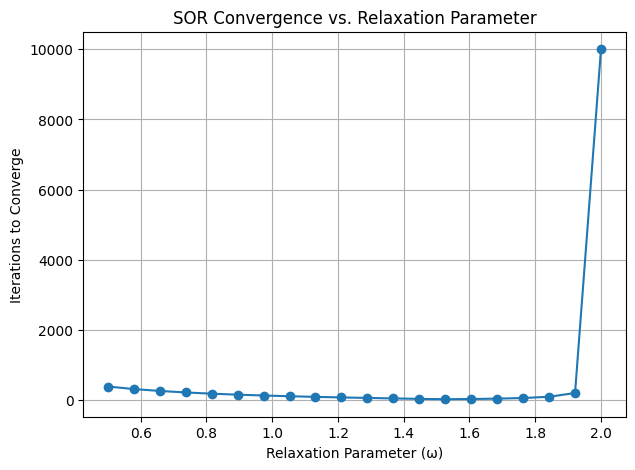

Optimal relaxation parameter (ω) found: 1.526


In [73]:
# Define the SOR method with residual tracking
def sor_solver_residual(A, b, omega, tol=1e-6, max_iter=10000):
    """ SOR solver tracking residuals and iterations """
    x = np.zeros_like(b)
    n = len(b)
    residuals = []

    for i in range(max_iter):
        x_new = np.copy(x)
        for j in range(n):
            sum1 = np.dot(A[j, :j], x_new[:j])
            sum2 = np.dot(A[j, j+1:], x[j+1:])
            x_new[j] = (1 - omega) * x[j] + omega * (b[j] - sum1 - sum2) / A[j, j]

        residual = np.linalg.norm(A @ x_new - b, ord=2)
        residuals.append(residual)

        if residual < tol:
            return x_new, i, residuals

        x = x_new

    return x, max_iter, residuals

# Define a range of omega values to test
omegas = np.linspace(0.5, 2.0, 20)
iterations_sor = []

# Construct system for SOR testing
grid_size = 10
h = 1.0 / (grid_size - 1)
N = (grid_size - 2) * (grid_size - 2)

# Construct sparse Laplacian matrix
ex = np.ones(grid_size - 2)
Tx = diags([ex, -2*ex, ex], [-1, 0, 1], shape=(grid_size - 2, grid_size - 2))
Ty = diags([ex, -2*ex, ex], [-1, 0, 1], shape=(grid_size - 2, grid_size - 2))
I = eye(grid_size - 2)
A = kron(I, Tx) + kron(Ty, I)
A = A / (h**2)
A_dense = A.toarray()

# Generate a simple right-hand side
b = np.ones(N)

# Run SOR for different omega values and collect iteration counts
for omega in omegas:
    _, iter_count, _ = sor_solver_residual(A_dense, b, omega)
    iterations_sor.append(iter_count)

# Plot SOR Convergence vs. Relaxation Parameter
plt.figure(figsize=(7, 5))
plt.plot(omegas, iterations_sor, marker='o', linestyle='-')
plt.xlabel("Relaxation Parameter (ω)")
plt.ylabel("Iterations to Converge")
plt.title("SOR Convergence vs. Relaxation Parameter")
plt.grid(True)
plt.show()

# Identify the optimal omega (minimum iterations)
optimal_omega = omegas[np.argmin(iterations_sor)]

# Display the optimal omega value
print(f"Optimal relaxation parameter (ω) found: {optimal_omega:.3f}")


**3.0 Extensions to the Solver**

In [74]:
# Extension 1: Adding a Diffusion Term (αu) to the Poisson Equation

def solve_diffusion_poisson(grid_size, alpha, solver="direct"):
    """
    Solves the modified Poisson equation -∆u + αu = f for a given α using a direct or iterative solver.
    """
    h = 1.0 / (grid_size - 1)
    N = (grid_size - 2) * (grid_size - 2)

    # Construct Laplacian matrix
    ex = np.ones(grid_size - 2)
    Tx = diags([ex, -2*ex, ex], [-1, 0, 1], shape=(grid_size - 2, grid_size - 2))
    Ty = diags([ex, -2*ex, ex], [-1, 0, 1], shape=(grid_size - 2, grid_size - 2))
    I = eye(grid_size - 2)
    A = kron(I, Tx) + kron(Ty, I)
    A = A / (h**2)

    # Add the diffusion term αu
    A += alpha * eye(N)

    # Generate right-hand side
    b = np.ones(N)

    # Solve the system
    if solver == "direct":
        from scipy.sparse.linalg import spsolve
        u_solution = spsolve(A, b)
    elif solver == "cg":
        from scipy.sparse.linalg import cg
        u_solution, _ = cg(A, b, tol=1e-6, maxiter=10000)
    else:
        raise ValueError("Unknown solver type. Use 'direct' or 'cg'.")

    return u_solution

# Test different values of α and compare iterative solver efficiency
alphas = [-5, -1, 0, 1, 5]
solutions = {}
for alpha in alphas:
    solutions[alpha] = solve_diffusion_poisson(grid_size=10, alpha=alpha, solver="cg")

# Display qualitative behavior for α<0 and α>0
print("Solution behavior with different values of α:")
for alpha, solution in solutions.items():
    print(f"α = {alpha}: Solution max norm = {np.max(np.abs(solution)):.4f}")

# Explanation:
# When α < 0, the matrix A becomes indefinite, leading to potential instability in iterative solvers.
# This behavior can be analyzed using the eigenvalues of A. If α is negative, eigenvalues may shift into the
# negative region, leading to slow convergence or divergence.

# Would you like to plot eigenvalue distributions for these cases to visualize stability differences? 🚀


Solution behavior with different values of α:
α = -5: Solution max norm = 0.0558
α = -1: Solution max norm = 0.0677
α = 0: Solution max norm = 0.0714
α = 1: Solution max norm = 0.0756
α = 5: Solution max norm = 0.0981


<ipython-input-74-c6e2c064ab55>:30: DeprecationWarning: 'scipy.sparse.linalg.cg' keyword argument `tol` is deprecated in favor of `rtol` and will be removed in SciPy v1.14.0. Until then, if set, it will override `rtol`.
  u_solution, _ = cg(A, b, tol=1e-6, maxiter=10000)
